# Get data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-09-16 10:26:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2021-09-16 10:26:05 (43.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
import pandas as pd

In [ ]:
# Read in Bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # Parse the date columns and tell pandas column 1 is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
# How many samples do we have?
len(df)

2787

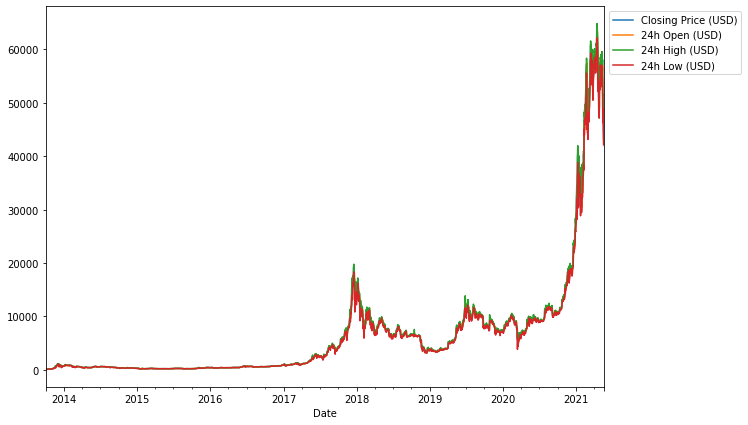

In [ ]:
df.plot(figsize = (10,7)).legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
# Leaving only 'Closing Price' column on the table for each day

bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


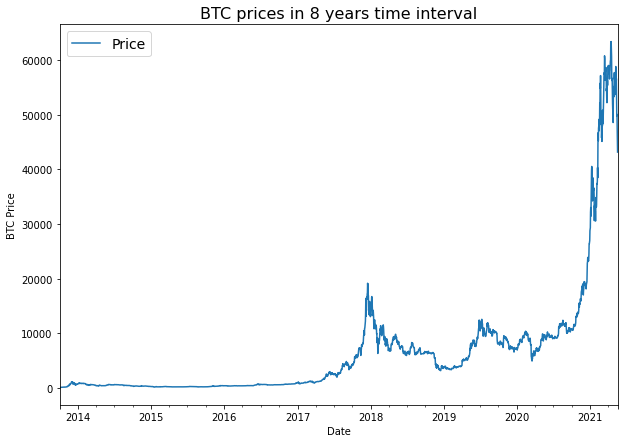

In [ ]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize = (10,7))
plt.ylabel("BTC Price")
plt.title("BTC prices in 8 years time interval", fontsize=16)
plt.legend(fontsize=14);

## Importing time series with python's csv module

In [ ]:
import csv
from datetime import datetime

In [ ]:
# Importing and formatting historical Bitcoin data with Python

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not string) (strptime = string pass time)
    btc_price.append(float(line[2])) # get the 'closing price' as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

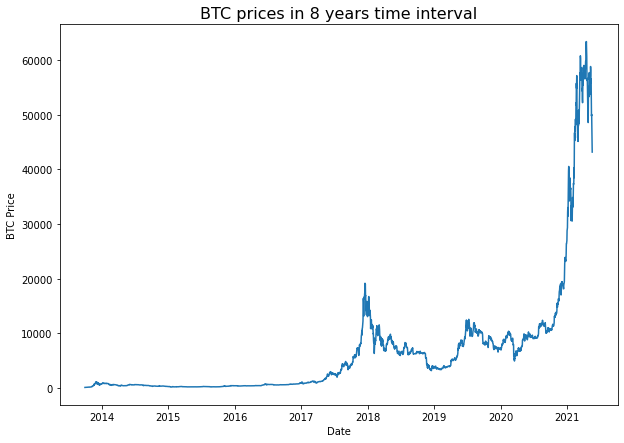

In [ ]:
# Plot from CSV
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("BTC prices in 8 years time interval", fontsize=16)
plt.xlabel("Date");

## Creating train and test splits for 'time series'

In [ ]:
split_size = int(0.8 * len(bitcoin_prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = np.array(timesteps[:split_size]), np.array(btc_price[:split_size])

# Create test data splits (everything beyond the split)
X_test, y_test = np.array(timesteps[split_size:]), np.array(btc_price[split_size:]) 

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

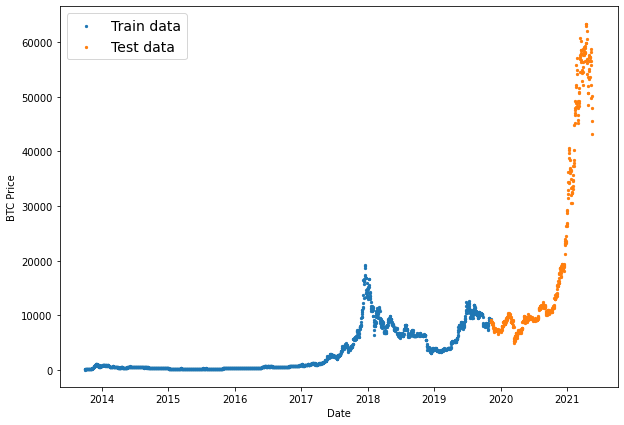

In [ ]:
# Plot splits 
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function 

In [ ]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots a series of values accross timesteps.
  
  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values accross time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

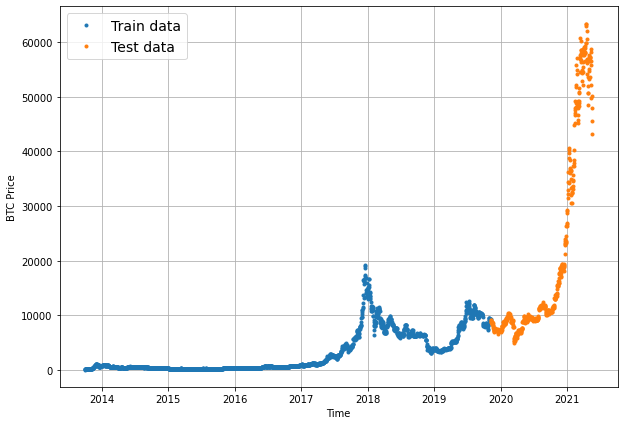

In [ ]:
# Test out plotting fucntion
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [ ]:
# Create a naive forecast
naive_forecast = np.array(y_test[:-1])

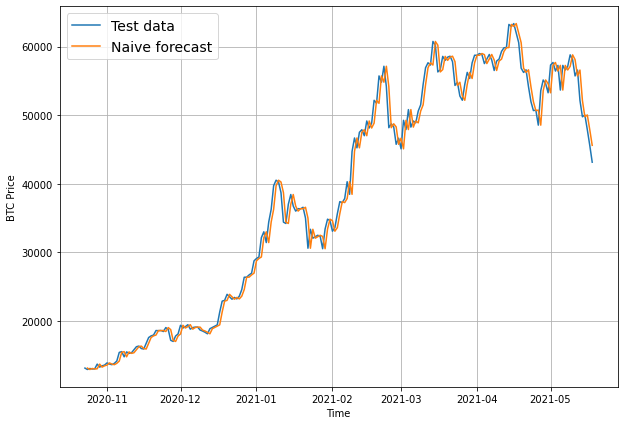

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast")

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation 
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is one day (hence the shift of 1)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182626

In [ ]:
def evaluate_preds(y_true, y_pred):
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802273457542,
 'mape': 2.5165249299822667,
 'mase': 0.9995699939182626,
 'mse': 1147547.125023896,
 'rmse': 1071.2362601330744}

## Other styles of time series forecasting models we can use for baselines and for actual forecasts

link: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

sktime is an important library designed for time series problems

## Format data part 2: Windowing our dataset

Why do we window our data?

We window our time series dataset to turn our data into a supervised learning problem. 


[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]

In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use {btc_price[:7]} to predict {btc_price[7]}")

We want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [ ]:
# Set up global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.
  E.g. if horizon=1
  input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7]) 
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


### Formatting function that I have created

In [ ]:
def format_data(x, horizon=HORIZON, window=WINDOW_SIZE):
  lis = []
  try:
    for i in range(len(x)):
      lis.append((x[i:i+window], x[i+window:i+window+horizon]))
    return lis
  except:
    return lis

In [ ]:
format_data(btc_price, horizon=1, window=7)


[([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
  [123.033]),
 ([125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033],
  [124.049]),
 ([108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049],
  [125.96116]),
 ([118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116],
  [125.27966]),
 ([121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116, 125.27966],
  [125.9275]),
 ([120.65533, 121.795, 123.033, 124.049, 125.96116, 125.27966, 125.9275],
  [126.38333]),
 ([121.795, 123.033, 124.049, 125.96116, 125.27966, 125.9275, 126.38333],
  [135.24199]),
 ([123.033, 124.049, 125.96116, 125.27966, 125.9275, 126.38333, 135.24199],
  [133.20333]),
 ([124.049, 125.96116, 125.27966, 125.9275, 126.38333, 135.24199, 133.20333],
  [142.76333]),
 ([125.96116, 125.27966, 125.9275, 126.38333, 135.24199, 133.20333, 142.76333],
  [137.92333]),
 ([125.27966, 125.9275, 126.38333, 135.24199, 133.20333, 142.76333, 137.92333],
  [142

### Formatting function built in the video

The function has been created by NumPy's indexing methods instead of python's for loop which would be slower on large datas.

For more on numpy indexing, see: https://numpy.org/doc/stable/reference/arrays.indexing.html

Also see: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

Function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])

2. Use NumPy indexing to create a 2D array of multiple window steps, for example:

[[0, 1, 2, 3, 4, 5, 6],

 [1, 2, 3, 4, 5, 6, 7],

 [2, 3, 4, 5, 6, 7, 8],...]

3. Use the 2D array of multiple window steps (from step 2) to index on a target series (e.g. the historical price of Bitcoin)

4. Use our 'get_labelled_windows()' function we created above to turn the window steps into windows with a specified horizon.

In [ ]:
import numpy as np

In [ ]:
btc_price = np.array(btc_price) 

In [ ]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
np.expand_dims(np.arange(len(btc_price)-(WINDOW_SIZE+HORIZON-1)), axis=0).T

array([[   0],
       [   1],
       [   2],
       ...,
       [2777],
       [2778],
       [2779]])

In [ ]:
len(btc_price)

2787

In [ ]:
k = np.array([0, 1, 2])
h = np.expand_dims(np.arange(6), axis=0).T
h

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
k+h

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

In [ ]:
# Testing out the function
full_windows, full_labels = make_windows(btc_price)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
len(btc_price)

2787

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}\n")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]

Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]

Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]



In [ ]:
btc_price[-1]

43144.4712908603

> There is a built-in tensorflow function 'tf.keras.utils.timeseries_dataset_from_array' that does the job we have just done by our 'make_windows' function.

This is the link: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Make the train test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1 - test_split)) # This will default to 80% train/ 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best perfomances against the other models' best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: 

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), save_best_only=True)

# Model 1: Dense model (window=7, horizon=1)

In [ ]:
import tensorflow as tf

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON, activation=tf.keras.activations.linear)
], name="model_1_dense")

model_1.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

model_1_history = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 780.3469 - mae: 780.3469 - mse: 2312739.0000 - val_loss: 2279.5828 - val_mae: 2279.5828 - val_mse: 12772095.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 247.6765 - mae: 247.6765 - mse: 285480.9375 - val_loss: 1005.9864 - val_mae: 1005.9864 - val_mse: 3441759.2500
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 188.4107 - mae: 188.4107 - mse: 171890.0312 - val_loss: 923.2859 - val_mae: 923.2859 - val_mse: 2868195.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 169.4334 - mae: 169.4334 - mse: 151699.4375 - val_loss: 900.5932 - val_mae: 900.5932 - val_mse: 2683713.7500
INFO:tensorflow:Assets written to: model_ex

In [ ]:
# Evaluate model 1 on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 662.5322 - mae: 662.5322 - mse: 1358192.1250


[662.5322265625, 662.5322265625, 1358192.125]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model(filepath="model_experiments/model_1_dense/") 
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 568.5499 - mae: 568.5499 - mse: 1172587.7500


[568.5498657226562, 568.5498657226562, 1172587.75]

## Making forecasts with a model (on the test dataset) - Creating a function

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.835,
        8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>)

In [ ]:
test_labels.shape, model_1_preds.shape 

((556, 1), TensorShape([556]))

In [ ]:
test_labels = tf.cast(test_labels, dtype="float32")

In [ ]:
model_1_results = evaluate_preds(tf.squeeze(test_labels, axis=1), model_1_preds)
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

In [ ]:
naive_results

{'mae': 567.9802273457542,
 'mape': 2.5165249299822667,
 'mase': 0.9995699939182626,
 'mse': 1147547.125023896,
 'rmse': 1071.2362601330744}

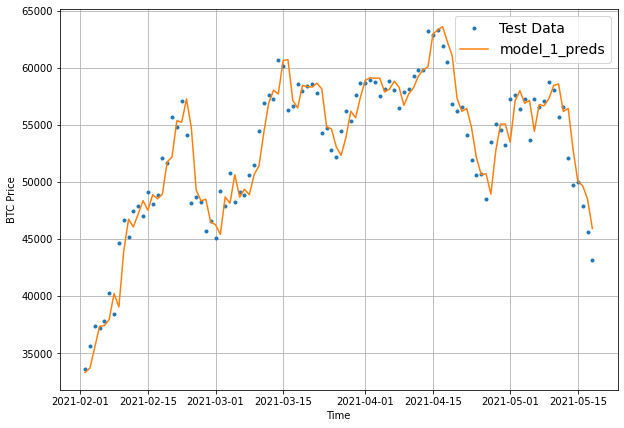

In [ ]:
# Plot model_1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Acount for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels, start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

# Model 2: Dense (window=30, horizon=1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
len(full_windows[0])

30

In [ ]:
# Make train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

model_2_history = model_2.fit(train_windows, 
                              train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 0,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 658.0289 - mae: 658.0289 - mse: 1417080.8750


[658.0288696289062, 658.0288696289062, 1417080.875]

In [ ]:
# Load in the best performance of model 2
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 608.8480 - mae: 608.8480 - mse: 1284314.3750


[608.8480224609375, 608.8480224609375, 1284314.375]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2, test_windows)

In [ ]:
test_labels[0].dtype

dtype('float64')

In [ ]:
test_labels.shape, model_2_preds.shape

((552, 1), TensorShape([552]))

In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(tf.squeeze(tf.cast(test_labels, dtype="float32")), model_2_preds)
model_2_results

{'mae': 608.8481,
 'mape': 2.7680666,
 'mase': 1.0642723,
 'mse': 1284314.4,
 'rmse': 1133.276}

In [ ]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

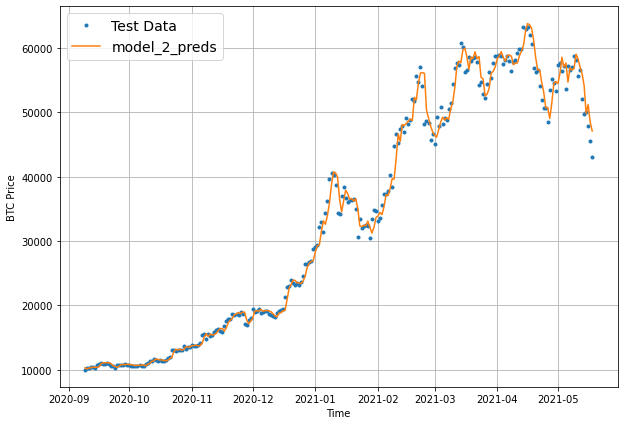

In [ ]:
offset=300

plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, label="model_2_preds", format="-")

# Model 3: Dense model (window_size=30, horizon=7)

In [ ]:
WINDOW_SIZE=30
HORIZON=7

In [ ]:
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
len(full_windows[0]), len(full_labels[0])

(30, 7)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

model_3_history = model_3.fit(train_windows,
                              train_labels,
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1322.7781 - mae: 1322.7781 - mse: 5710234.5000


[1322.778076171875, 1322.778076171875, 5710234.5]

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1228.1417 - mae: 1228.1417 - mse: 5323686.5000


[1228.1417236328125, 1228.1417236328125, 5323686.5]

In [ ]:
# Make predictions with model 3 
model_3_preds = make_preds(model_3, test_windows)

In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9233.328 , 9332.702 , 9363.651 , 9442.775 , 9401.978 , 9414.001 ,
        9280.01  ],
       [8911.084 , 9065.984 , 9113.08  , 9026.601 , 8990.093 , 9000.148 ,
        9053.433 ],
       [8848.506 , 9018.2295, 9006.146 , 8934.578 , 8929.888 , 8856.351 ,
        8958.367 ],
       [9048.449 , 9058.819 , 8966.749 , 9127.248 , 8982.123 , 9056.629 ,
        9002.575 ],
       [8958.309 , 9008.146 , 8827.891 , 8995.736 , 9129.433 , 9099.142 ,
        8881.021 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(tf.cast(test_labels, dtype="float32"), model_3_preds)
model_3_results

{'mae': array([  559.42004 ,   276.0053  ,   298.20258 ,   408.06152 ,
          431.32047 ,   526.28064 ,   542.41644 ,   459.79108 ,
          490.63736 ,   631.6582  ,   802.51654 ,   731.79333 ,
          684.06476 ,   789.71857 ,   563.4593  ,   271.9013  ,
          231.86858 ,   258.64767 ,   277.65277 ,   291.5478  ,
          105.425575,   132.63156 ,   205.97643 ,   262.20816 ,
          169.8651  ,   165.05127 ,   110.21959 ,    83.64655 ,
          115.86182 ,   152.87025 ,   279.98862 ,   380.96127 ,
          280.21414 ,   271.9101  ,   264.43088 ,   261.91315 ,
          330.29108 ,   242.21861 ,   253.72746 ,   245.38596 ,
          412.562   ,   128.63539 ,    88.56452 ,    92.15639 ,
          100.39704 ,   102.41455 ,    74.52804 ,    94.00349 ,
           84.86837 ,    76.64781 ,   108.49679 ,   144.869   ,
          187.69133 ,   162.5261  ,   265.83133 ,   391.21323 ,
          552.2943  ,   541.77313 ,   522.20886 ,   523.98157 ,
          430.13052 ,   276.80893

In [ ]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([551, 7]), TensorShape([552]), TensorShape([556]))

## Make our evaluation function work for larger horizons

In [ ]:
model_3_results["mae"].shape, model_2_results["mae"].shape

((551,), ())

In [ ]:
model_3_results["mae"].ndim, model_2_results["mae"].ndim 

(1, 0)

In [ ]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1228.1416

In [ ]:
def evaluate_preds(y_true, y_pred):
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Model 3 results aggregated to single value
model_3_results = evaluate_preds(tf.cast(test_labels, dtype="float32"), model_3_preds)
model_3_results

{'mae': 1228.1416,
 'mape': 5.4698334,
 'mase': 2.1854093,
 'mse': 5323686.5,
 'rmse': 1412.9114}

## Plotting model 3 preds

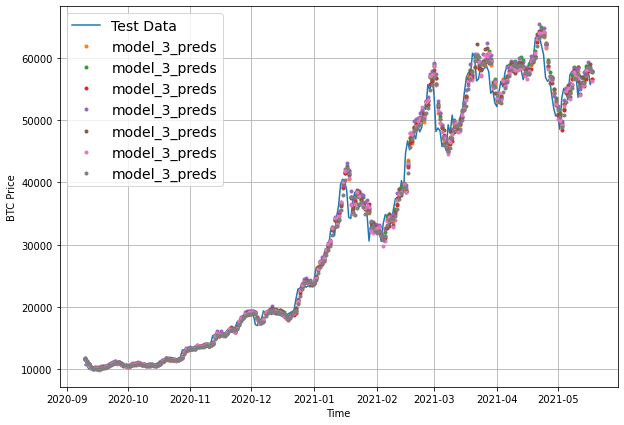

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], format="-", start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [ ]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9233.328, 9332.702, 9363.651, 9442.775, 9401.978, 9414.001,
       9280.01 ], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds[0]) # We condensed the actual outputs, but we have lost some information while condensing

<tf.Tensor: shape=(), dtype=float32, numpy=9352.635>

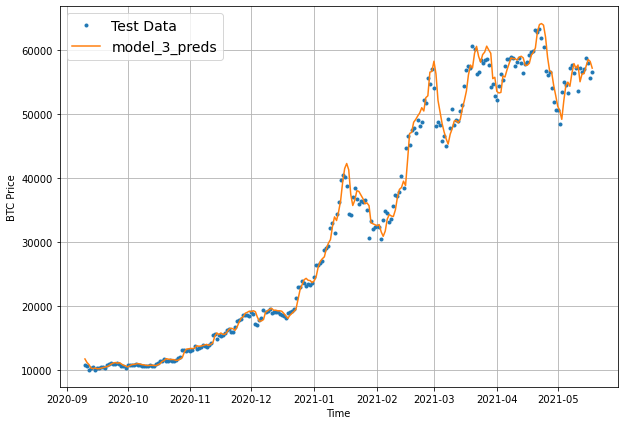

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, label="model_3_preds", format="-")

# Comparing all models so far

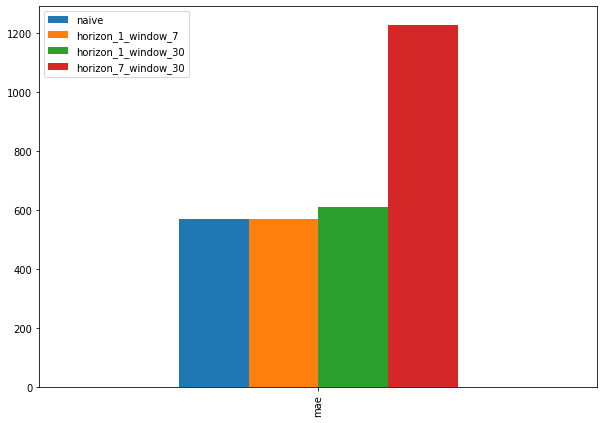

In [ ]:
import pandas as pd

df = pd.DataFrame({"naive": naive_results["mae"],
                   "horizon_1_window_7": model_1_results["mae"],
                   "horizon_1_window_30": model_2_results["mae"],
                   "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

> How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls

>link: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

# Model 4: Conv1D

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use Conv1D layer, we need an input shape of: '(batch_size, time_steps, input_dim)'...

However, our data isn't in that shape yet...

In [ ]:
# Check data input shape
train_windows.shape

(2224, 7)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for 'input_dim'

In [ ]:
# Test out our lambda layer
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [ ]:
print(f"Original shape: {x.shape}\n") # WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}\n")
print(f"Original values with expanded shape:\n{expand_dims_layer(x)}")

Original shape: (7,)

Expanded shape: (7, 1)

Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Creating the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_4_Conv1D")

model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

In [ ]:
model_4_history = model_4.fit(train_windows,
                              train_labels,
                              epochs = 100,
                              batch_size = 128,
                              verbose = 0,
                              validation_data = (test_windows, test_labels),
                              callbacks = [create_model_checkpoint(model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 624.1893 - mae: 624.1893 - mse: 1271775.5000


[624.1892700195312, 624.1892700195312, 1271775.5]

In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 569.0326 - mae: 569.0326 - mse: 1169841.0000


[569.0325927734375, 569.0325927734375, 1169841.0]

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8847.293, 8757.503, 8997.469, 8762.801, 8707.722, 8713.594,
       8664.935, 8496.83 , 8439.473, 8499.395], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(tf.squeeze(tf.cast(test_labels, dtype="float32")), model_4_preds)
model_4_results

{'mae': 569.03265,
 'mape': 2.5515254,
 'mase': 0.9996328,
 'mse': 1169841.0,
 'rmse': 1081.5919}

In [ ]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

# Model 5: RNN (LSTM)

In [ ]:
tf.random.set_seed(42)

# Create a model with Functional API
inputs = tf.keras.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

In [ ]:
model_5_history = model_5.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_5.name)]) 

Epoch 1/100
18/18 [==============================] - 2s 21ms/step - loss: 2323.6123 - mae: 2323.6123 - mse: 13451195.0000 - val_loss: 9224.3506 - val_mae: 9224.3506 - val_mse: 150612624.0000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 695.4956 - mae: 695.4956 - mse: 1664444.5000 - val_loss: 1485.8942 - val_mae: 1485.8942 - val_mse: 6265326.5000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 237.3010 - mae: 237.3010 - mse: 238377.8125 - val_loss: 1298.9435 - val_mae: 1298.9435 - val_mse: 4395031.0000
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 181.9182 - mae: 181.9182 - mse: 168792.6406 - val_loss: 966.6407 - val_mae: 966.6407 - val_mse: 3159430.5000
INFO:tensorflow:Assets written to: mode

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.9866 - mae: 594.9866 - mse: 1259464.8750


[594.986572265625, 594.986572265625, 1259464.875]

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 591.6655 - mae: 591.6655 - mse: 1250831.6250


[591.6654663085938, 591.6654663085938, 1250831.625]

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8970.957, 8815.352, 9026.793, 8831.478, 8736.686, 8804.464,
       8733.207, 8540.421, 8518.281, 8544.508], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(tf.squeeze(tf.cast(test_labels, dtype="float32")), model_5_preds)
model_5_results

{'mae': 591.6655,
 'mape': 2.66558,
 'mase': 1.0393925,
 'mse': 1250831.6,
 'rmse': 1118.4059}

In [ ]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

# Make a multivariate time series dataset

We will use Bitcoin halving as an additional feature besides historical Bitcoin prices to predict pseudo future Bitcoin prices. Bitcoin halving has a significant effect on the historical prices of Bitcoin.

For more on Bitcoin halving, see: https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

Also we will use the historical data of bitcoin halving from the table in this link...

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [ ]:
# Let's add the bitcoin halving to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

>To be able to create a date_range we can also use this function: https://pandas.pydata.org/docs/reference/api/pandas.date_range.html


block_reward_2_date_range = pd.date_range(start="2013-10-01", end="2016-07-08")

block_reward_3_date_range = pd.date_range(start=block_reward_3_datetime, end="2020-05-17")

block_reward_4_date_range = pd.date_range(start=block_reward_4_datetime, end="2021-05-18")

In [ ]:
# Create date ranges of where specific block_rewards should be 
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


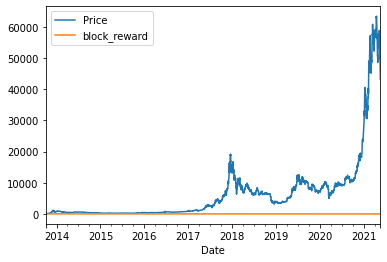

In [ ]:
bitcoin_prices_block.plot()

In [ ]:
# Plot block reward vs price over time
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)

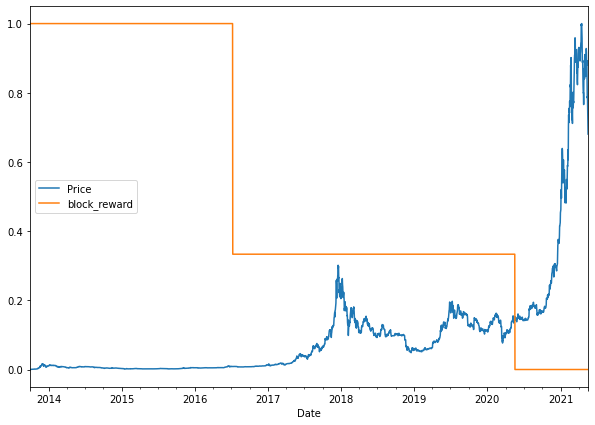

In [ ]:
scaled_price_block_df.plot(figsize=(10, 7));

# Making a windowed dataset with pandas

Previously, we have turned our univariate time series into windowed dataset using the 'make_windows' function we have created.

However, since we have got now multivariate data, this function won't work.

Therefore, we will use 'pandas.DataFrame.shift()' method to window our multivariate data.

For more on 'pandas.DataFrame.shift()', see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is creating a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]

[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]

[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```



In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6: Same as model 1 but with multivariate dataset

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

In [ ]:
model_6_history = model_6.fit(X_train,
                              y_train,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(X_test, y_test),
                              callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 1234.6880 - mae: 1234.6880 - mse: 5282050.0000 - val_loss: 2061.8428 - val_mae: 2061.8428 - val_mse: 11377038.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 351.5003 - mae: 351.5003 - mse: 499344.8750 - val_loss: 1908.7257 - val_mae: 1908.7257 - val_mse: 8719859.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 235.4110 - mae: 235.4110 - mse: 275999.5938 - val_loss: 1329.5310 - val_mae: 1329.5310 - val_mse: 4993977.0000
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 208.6456 - mae: 208.6456 - mse: 219543.2344 - val_loss: 1102.0128 - val_mae: 1102.0128 - val_mse: 3934337.000

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 645.7142 - mae: 645.7142 - mse: 1322403.3750


[645.7142333984375, 645.7142333984375, 1322403.375]

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 568.3345 - mae: 568.3345 - mse: 1164859.0000


[568.33447265625, 568.33447265625, 1164859.0]

In [ ]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8845.381 , 8769.115 , 9044.852 , 8745.515 , 8727.0625, 8773.182 ,
       8669.289 , 8502.578 , 8469.248 , 8527.997 ], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 568.33435,
 'mape': 2.5493023,
 'mase': nan,
 'mse': 1164858.9,
 'rmse': 1079.2863}

In [ ]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

# Model 7: N-BEATS algorithm

Paper link: https://arxiv.org/abs/1905.10437

## Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we have got to create it manually.

To create custom layers and models in TensorFlow, we can use **subclassing**.

For more on sunclassing, see: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatsBlock custom layer
class NbeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments (parameters) for the parent class (e.g. input_shape, tarinable, name...). Parent class = 'tf.keras.layers.Layer' in paranthesis in 'class NbeatsBlock(tf.keras.layers.Layer):'
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)] 
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called. It is what defines the computation from the inputs to the outputs.
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

>We are going to test our NBeatsBlock class.

>To do so, we'll make some dummy inputs and outputs.

In [ ]:
# Setup dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NbeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) # input shape to the model has to reflect dense layer input requirements (data should be 2D array for Dense layer inputs (batch_size, input_dim))
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"\nForecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014983  0.8379835  -0.32870027  0.25159904 -0.47540277 -0.7783665
 -0.5299448 ]

Forecast: -0.7554212808609009


## Preparing data for the N-BEATS algorithm using `tf.data`

For more on `tf.data`, see: https://www.tensorflow.org/guide/data

also see: https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns with pandas
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size=int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features and labels -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

## Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON 
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for the residual connections

In paper, residual connections are mentioned in section(3.2), '**3.2 DOUBLY RESIDUAL STACKING**': https://arxiv.org/pdf/1905.10437.pdf

For more on residual network, see: https://arxiv.org/pdf/1512.03385.pdf

,and see: https://paperswithcode.com/method/resnet

,and see: https://en.wikipedia.org/wiki/Residual_neural_network

The N-BEATS algorithm uses double residual stacking (adding and subtracting) to help train its deeper architecture.

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add). We have these layers implemented in tensorflow;

for adding layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add

for subtracting layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/subtract

**Another extention:** For more on residuals, see: https://otexts.com/fpp2/residuals.html

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# Add
added = tf.keras.layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"\nSubtracted: {subtracted.numpy()}")
print(f"\nAdded: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]

Subtracted: [10 10 10 10 10 10 10 10 10 10]

Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NbeatsBlock` (this will be the initial block used for the network, then the rest will be as part of stacks)

2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)

3. Make the initial backcast and forecast for the model with the layer created in (1)

4. Use for loop to create stacks of block layers

5. Use the `NBeatsBlock` class within the for loop in (4) to create block which return backcasts and block-level forecasts 

6. Create the double residual stacking using subtract and add layers

7. Put the model inputs and outputs using `tf.keras.Model()` 

8. Compile the model with MAE loss (the paper multiple losses, but we'll use MAE to keep it in line with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper

9. Fit the N-BEATS model for 5000 epochs since it's fitting for so many epochs, we'll use a couple of callbacks: 

  * Early Stopping - because the model will be training for so long, we'll stop it early it stops imporving

  * Reduce LR on Plateau - if a model stops improving try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best perfomance)

In [ ]:
%%time

tf.random.set_seed(42)

nbeats_block_layer = NbeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")
residuals, forecast = nbeats_block_layer(stack_input)
for i, _ in enumerate(range(N_STACKS-1)): # First stack is already created 1 above so we need 29 stacks here which will be 30 in total
  backcast, block_forecast = NbeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}" 
  )(residuals) # pass in the residuals 

  residuals = tf.keras.layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = tf.keras.layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_NBEATS")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_7_history = model_7.fit(train_dataset,
                              epochs=N_EPOCHS,
                              verbose=0,
                              validation_data=test_dataset, 
                              callbacks = [tf.keras.callbacks.EarlyStopping(patience=200,
                                                                            restore_best_weights=True),
                                           tf.keras.callbacks.ReduceLROnPlateau(patience=100,
                                                                                verbose=1)])

In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=tf.cast(y_test, dtype="float32"), 
                                 y_pred=model_7_preds)
model_7_results

In [ ]:
model_1_results

In [ ]:
naive_results

In [ ]:
tf.keras.utils.plot_model(model_7)

# Model 8: Creating an ensemble (stacking different models together)

### Constructing and fitting an ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models. Each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models= [] 

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        tf.keras.layers.Dense(horizon)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(patience=100, 
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)
    
  return ensemble_models

In [ ]:
%%time

# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00874: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00986: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00595: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00131: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00246: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00346: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 00898: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00578: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 0

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of tarined models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions 
%%time
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

CPU times: user 642 ms, sys: 21.8 ms, total: 664 ms
Wall time: 739 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8761.406,  8753.121,  9029.975, ..., 50059.02 , 49067.98 ,
        46455.15 ],
       [ 8729.926,  8716.322,  9042.82 , ..., 49359.438, 48526.203,
        45399.992],
       [ 8746.472,  8719.418,  9093.042, ..., 49876.062, 47759.383,
        45164.582],
       ...,
       [ 8827.268,  8752.998,  9101.279, ..., 49402.25 , 49387.29 ,
        46209.2  ],
       [ 8726.868,  8802.271,  9100.06 , ..., 49581.004, 48522.934,
        45042.707],
       [ 8810.044,  8781.28 ,  9022.681, ..., 49915.977, 48227.773,
        45663.508]], dtype=float32)>

We need to combine the predictions of ensemble models. We can do that using some techniques of 'Combining Regression Predictions' which has been mentioned with this heading in this blog: https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

There are 2 different according to the blog:

* **Mean Predicted Value**

* **Median Predicted Value**

we'll try both of them, but Tensorflow doesn't have a function to calculate median so we'll use `numpy.median()` function. 

(median gets the middle value)

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean.shape

TensorShape([556])

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median.shape

(556,)

In [ ]:
# Evaluate ensemble model predictions
ensemble_results_mean = evaluate_preds(y_true=tf.cast(y_test, dtype="float32"), 
                                       y_pred=ensemble_mean)
ensemble_results_mean

{'mae': 568.46265,
 'mape': 2.5859838,
 'mase': 0.9986314,
 'mse': 1144678.5,
 'rmse': 1069.8965}

In [ ]:
ensemble_results_median = evaluate_preds(y_true=tf.cast(y_test, dtype="float32"), 
                                         y_pred=ensemble_median)
ensemble_results_median

{'mae': 566.1467,
 'mape': 2.5743344,
 'mase': 0.994563,
 'mse': 1137113.1,
 'rmse': 1066.3551}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

**Prediction interval:** It is a model's predicting a time interval instead of preciting 1 value. 

(e.g. predicting intervals:[50(lower bound), 100(upper bound)], one prediction:[75])

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models) 

2. Measure the standart deviation of the predictions

3. Multiply the standard deviation by 1.96 (assuming the distribution of our model's initial weights are initialized by Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)

for more on 1.96, see: https://en.wikipedia.org/wiki/1.96

4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in step 3 to the mean/median of the predictions made in step 1 

--------------------------------------------------------------------------------

**Extention:** https://eng.uber.com/neural-networks-uncertainty-estimation/

## Creating a function to calculate upper and lower bounds of ensemble predictions

In [ ]:
def get_upper_lower(preds): # step 1

  # step 2
  std = tf.math.reduce_std(preds, axis=0)

  # step 3
  interval = 1.96 * std

  # step 4
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(ensemble_preds)
lower.shape, upper.shape

(TensorShape([556]), TensorShape([556]))

> **Resource:** Many of the steps we have taken above have been inspired/referenced from the Machine Learning Mastery blog post on:

https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/

**Note:** A fundamental difference between mean and median is that the mean is much more sensitive to extreme values than the median. That is, one or two extreme values can change the mean a lot but do not change the the median very much. Thus, the median is more robust (less sensitive to outliers in the data) than the mean.


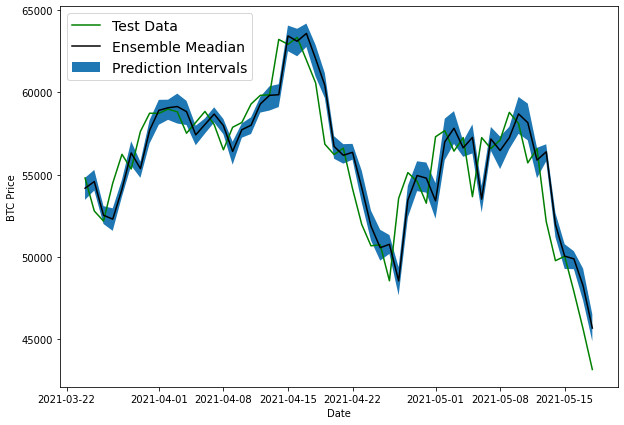

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Meadian")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

# Model 9: Train a model on the full historical data to make predictions into the future

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# Turn data into efficient running tensors
all_windows_dataset = tf.data.Dataset.from_tensor_slices(X_all)
all_labels_dataset = tf.data.Dataset.from_tensor_slices(y_all)

# Combine windows and labels
all_windows_labels_dataset = tf.data.Dataset.zip((all_windows_dataset, all_labels_dataset))

# Batch and prefetch for optimal performance
all_windows_labels_dataset = all_windows_labels_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

all_windows_labels_dataset

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
tf.random.set_seed(42)

# Creating the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON)
], name="model_9_future_model")

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
# Fit the model on all of the data to make future forecasts
model_9.fit(all_windows_labels_dataset,
            epochs=100,
            verbose=0)

## Make predictions into feature

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future, we want a function which:

1. Takes as input:

 * a list of values (Bitcoin historical data)

 * a trained model (such as model_9)

 * a window into the future to predict (our 'INTO_FUTURE' variable)

 * the window size a model was trained on ('WINDOW_SIZE') - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this will be returned at the end of the function when it's full of predictions) and extracts the last 'WINDOW_SIZE' values from the input values

3. Loop 'INTO_FUTURE' times making a prediction on 'WINDOW_SIZE' sequences which update to remove the first value and append the latest prediction

In [ ]:
def make_future_forecasts(data, model, into_future, window_size=WINDOW_SIZE):
  future_forecasts = []
  last_window = data[-window_size:]
  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n{last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    future_forecasts.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_forecasts)[-WINDOW_SIZE:]
  return future_forecasts

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(data=y_all, 
                                        model=model_9, 
                                        into_future=INTO_FUTURE, 
                                        window_size=WINDOW_SIZE)

Predicting on:
[56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55881.53125

Predicting on:
[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55881.53125   ] -> Prediction: 51063.07421875

Predicting on:
[50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55881.53125    55881.53125    51063.07421875] -> Prediction: 47718.90625

Predicting on:
[43144.47129086 55881.53125    55881.53125    51063.07421875
 55881.53125    51063.07421875 47718.90625   ] -> Prediction: 49238.17578125

Predicting on:
[55881.53125    51063.07421875 47718.90625    55881.53125
 51063.07421875 47718.90625    49238.17578125] -> Prediction: 55063.7421875

Predicting on:
[47718.90625    49238.17578125 55881.53125    51063.07421875
 47718.90625    49238.17578125 55063.7421875 ] -> Prediction: 49428.625

Predicting on:
[55063.7421875  55881.53125    51063.07421875 47718.90625
 49238.17578125 55

In [ ]:
future_forecast

[55881.53,
 51063.074,
 47718.906,
 49238.176,
 55063.742,
 49428.625,
 54411.89,
 53595.28,
 50174.9,
 49076.844,
 52157.734,
 54295.836,
 51303.523,
 53423.26]

## Plot future forecasts

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_data+into_future.
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start_date
  end_date = start_date + np.timedelta64(into_future, "D") # specify end_date

  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [ ]:
# Last timestep of timesteps (our indexes currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps, len(next_time_steps)

(array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
        '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
        '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
        '2021-05-31', '2021-06-01'], dtype='datetime64[D]'), 14)

In [ ]:
# Insert last timestep/final price into next timesteps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep) 
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

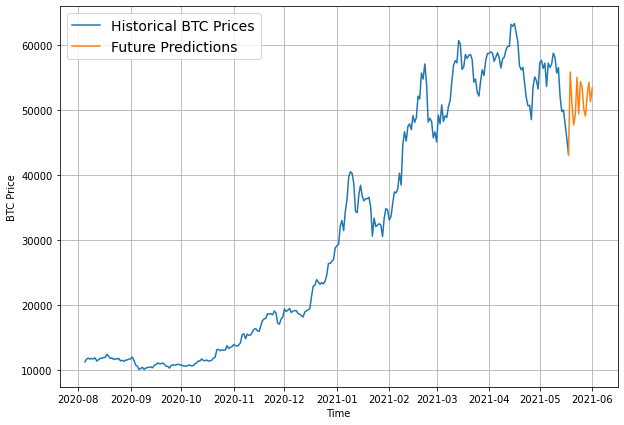

In [ ]:
# Plot future price predictions of Bitcoin 
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Historical BTC Prices")
plot_time_series(next_time_steps, future_forecast, format="-", label="Future Predictions")

# Model 10: Why forecasting is BS (the turkey problem)

In [ ]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361,   431.44471291])

In [ ]:
# Get timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

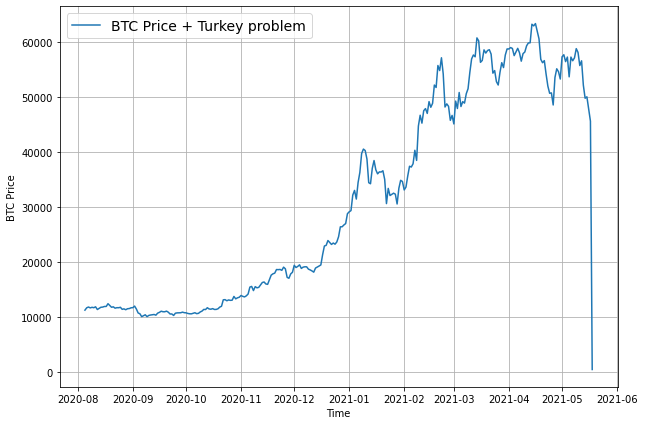

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(btc_timesteps_turkey, btc_price_turkey, format="-", label="BTC Price + Turkey problem", start=2500)

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.models.clone_model(model_1)
model_10._name = "model_10_turkey_model"

model_10.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_10_history = model_10.fit(X_train,
                                y_train,
                                epochs=100,
                                verbose=0,
                                batch_size=128,
                                validation_data = (X_test, y_test),
                                callbacks=[create_model_checkpoint(model_name=model_10.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
INFO:tensorflow:

In [ ]:
# Evaluate model on test data
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 739.3542


739.3541870117188

In [ ]:
# Load best performing turkey model and evaluate on test data
model_10 = tf.keras.models.load_model("model_experiments/model_10_turkey_model/")
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 645.3718


645.371826171875

In [ ]:
model_10_preds = make_preds(model_10, X_test)
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8874.493, 8789.944, 9040.986, 8804.829, 8741.21 , 8749.835,
       8705.865, 8513.171, 8478.415, 8536.302], dtype=float32)>

In [ ]:
# Evaluate model_10 preds
model_10_results = evaluate_preds(tf.cast(y_test, dtype="float32"), model_10_preds)
model_10_results

{'mae': 17140.822,
 'mape': 121.52865,
 'mase': 26.52548,
 'mse': 615263550.0,
 'rmse': 23737.229}

In [ ]:
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.6,
 'rmse': 1082.8608}

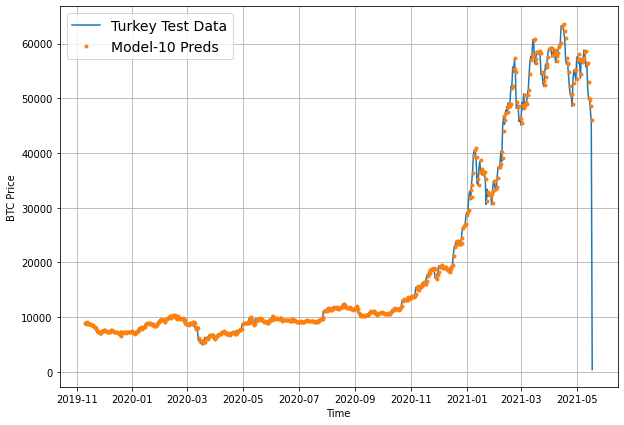

In [ ]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(btc_timesteps_turkey[-len(X_test):], btc_price_turkey[-len(y_test):], format="-", label="Turkey Test Data", start=offset)
plot_time_series(btc_timesteps_turkey[-len(X_test):], model_10_preds, label="Model-10 Preds", start=offset);

# Compare models

In [ ]:
# Compare different model results (w = window, h = horizon)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_Conv1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results_mean,
                              "model_10_turkey": model_10_results}).T
              
model_results.head(10)

In [ ]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");